# car price prediction

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import r2_score, make_scorer, mean_absolute_error
from sklearn.linear_model import SGDRegressor, LinearRegression,Lasso, Ridge


In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Importing carprice.csv
df = pd.read_csv("CarPrice.csv")

In [25]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
df.shape

(205, 26)

In [28]:
Company= df["CarName"].apply(lambda x : x.split(" ")[0])
df.insert(3, "Company", Company)
df.drop(["CarName"], axis=1, inplace=True)
df.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [30]:
#Fixing Companies's names
df.Company = df.Company.str.lower()

def fix_Company_name(x,y):
    df.Company.replace(x,y,inplace=True)
    
fix_Company_name("maxda","mazda")
fix_Company_name("porcshce","porsche")
fix_Company_name("vokswagen","volkswagen")
fix_Company_name("vw","volkswagen")
fix_Company_name("toyouta","toyota")

In [32]:
df.duplicated().sum()

0

In [33]:
df.columns

Index(['car_ID', 'symboling', 'Company', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

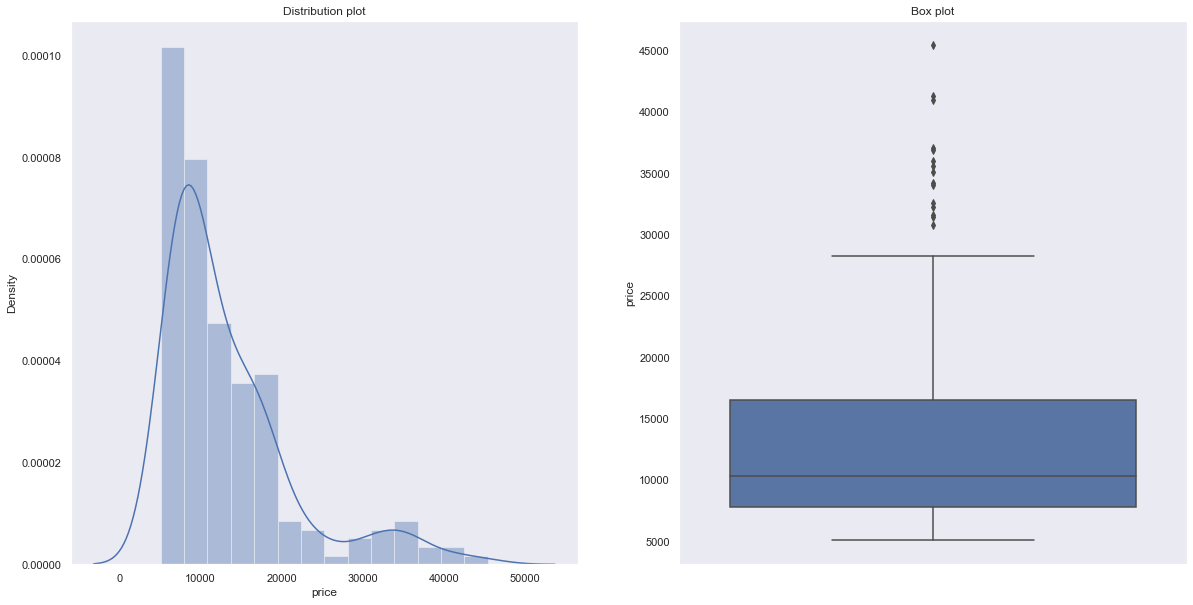

In [36]:
plt.figure(figsize=(20,10))
sns.set(style="dark") 

plt.subplot(1,2,1)
plt.title("Distribution plot")
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title("Box plot")
sns.boxplot(y=df.price);

<AxesSubplot:title={'center':'Symboling histogram'}, xlabel='symboling', ylabel='count'>

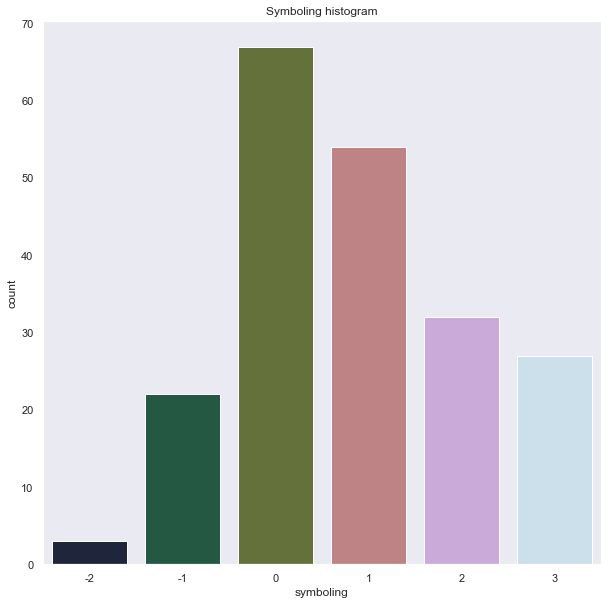

In [40]:
plt.figure(figsize=(22,10))

plt.subplot(1,2,1)
plt.title("Symboling histogram")
sns.countplot(df.symboling, palette=("cubehelix"))



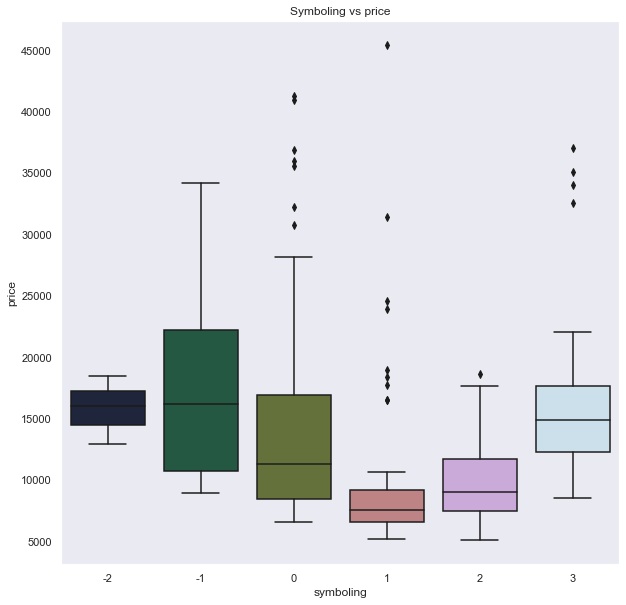

In [46]:
plt.figure(figsize=(22,10))
plt.subplot(1,2,1)
plt.title("Symboling vs price")
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"));

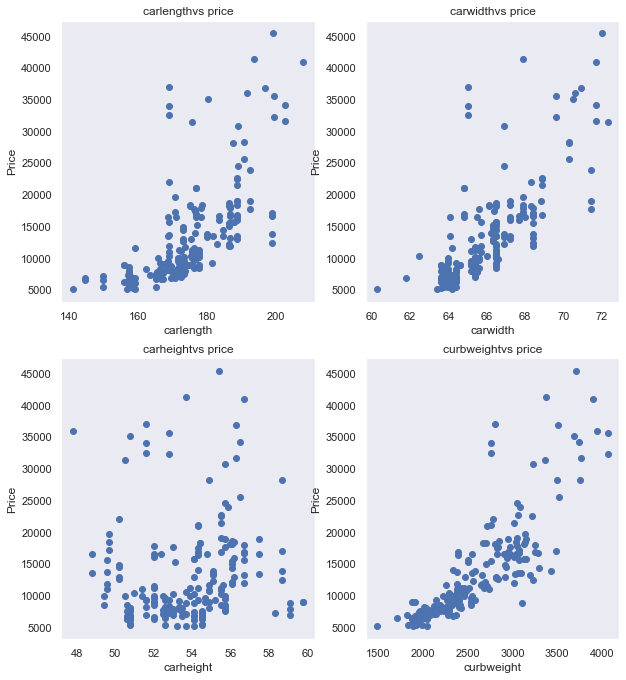

In [52]:
def scatter (x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x], df["price"])
    plt.title(x+ "vs price")
    plt.ylabel("Price")
    plt.xlabel(x)

plt.figure(figsize=(10,30))

scatter("carlength",1)
scatter("carwidth",2)
scatter("carheight",3)
scatter("curbweight",4);

In [58]:
df["fueleconomy"]= (0.55*df["citympg"]) +(0.45*df["highwaympg"])

In [59]:
#Binning the companies based of avr price
df["price"]=df["price"].astype("int")
temp=df.copy()
table=temp.groupby(["Company"])["price"].mean()
temp= temp.merge(table.reset_index(), how="left", on="Company")
bins= [0,10000,20000,40000]
cars_bins= ["Budget","Medium","Highend"]
df["Carsrange"]= pd.cut(temp["price_y"],bins,right=False, labels=cars_bins)
df.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carsrange,fueleconomy
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,Medium,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,Medium,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,Medium,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,Medium,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,Medium,19.80


Text(0, 0.5, 'Price')

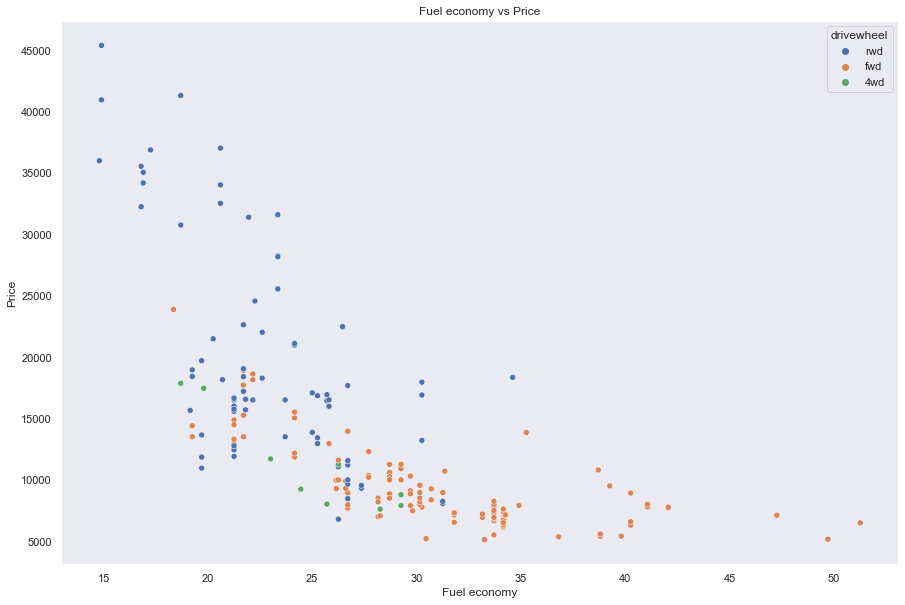

In [61]:
plt.figure(figsize=(15,10))
plt.title("Fuel economy vs Price")
sns.scatterplot(x=df["fueleconomy"],y=df["price"], hue=df["drivewheel"])
plt.xlabel("Fuel economy")
plt.ylabel("Price")

In [62]:
data_sv = df[['price','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize',,'horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'Carsrange']]
data_sv.head()

,price,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,horsepower,fueleconomy,carlength,carwidth,Carsrange
0,13495,convertible,rwd,88.6,2548,dohc,four,130,111,23.70,168.8,64.1,Medium
1,16500,convertible,rwd,88.6,2548,dohc,four,130,111,23.70,168.8,64.1,Medium
2,16500,hatchback,rwd,94.5,2823,ohcv,six,152,154,22.15,171.2,65.5,Medium
3,13950,sedan,fwd,99.8,2337,ohc,four,109,102,26.70,176.6,66.2,Medium
4,17450,sedan,4wd,99.4,2824,ohc,five,136,115,19.80,176.6,66.4,Medium


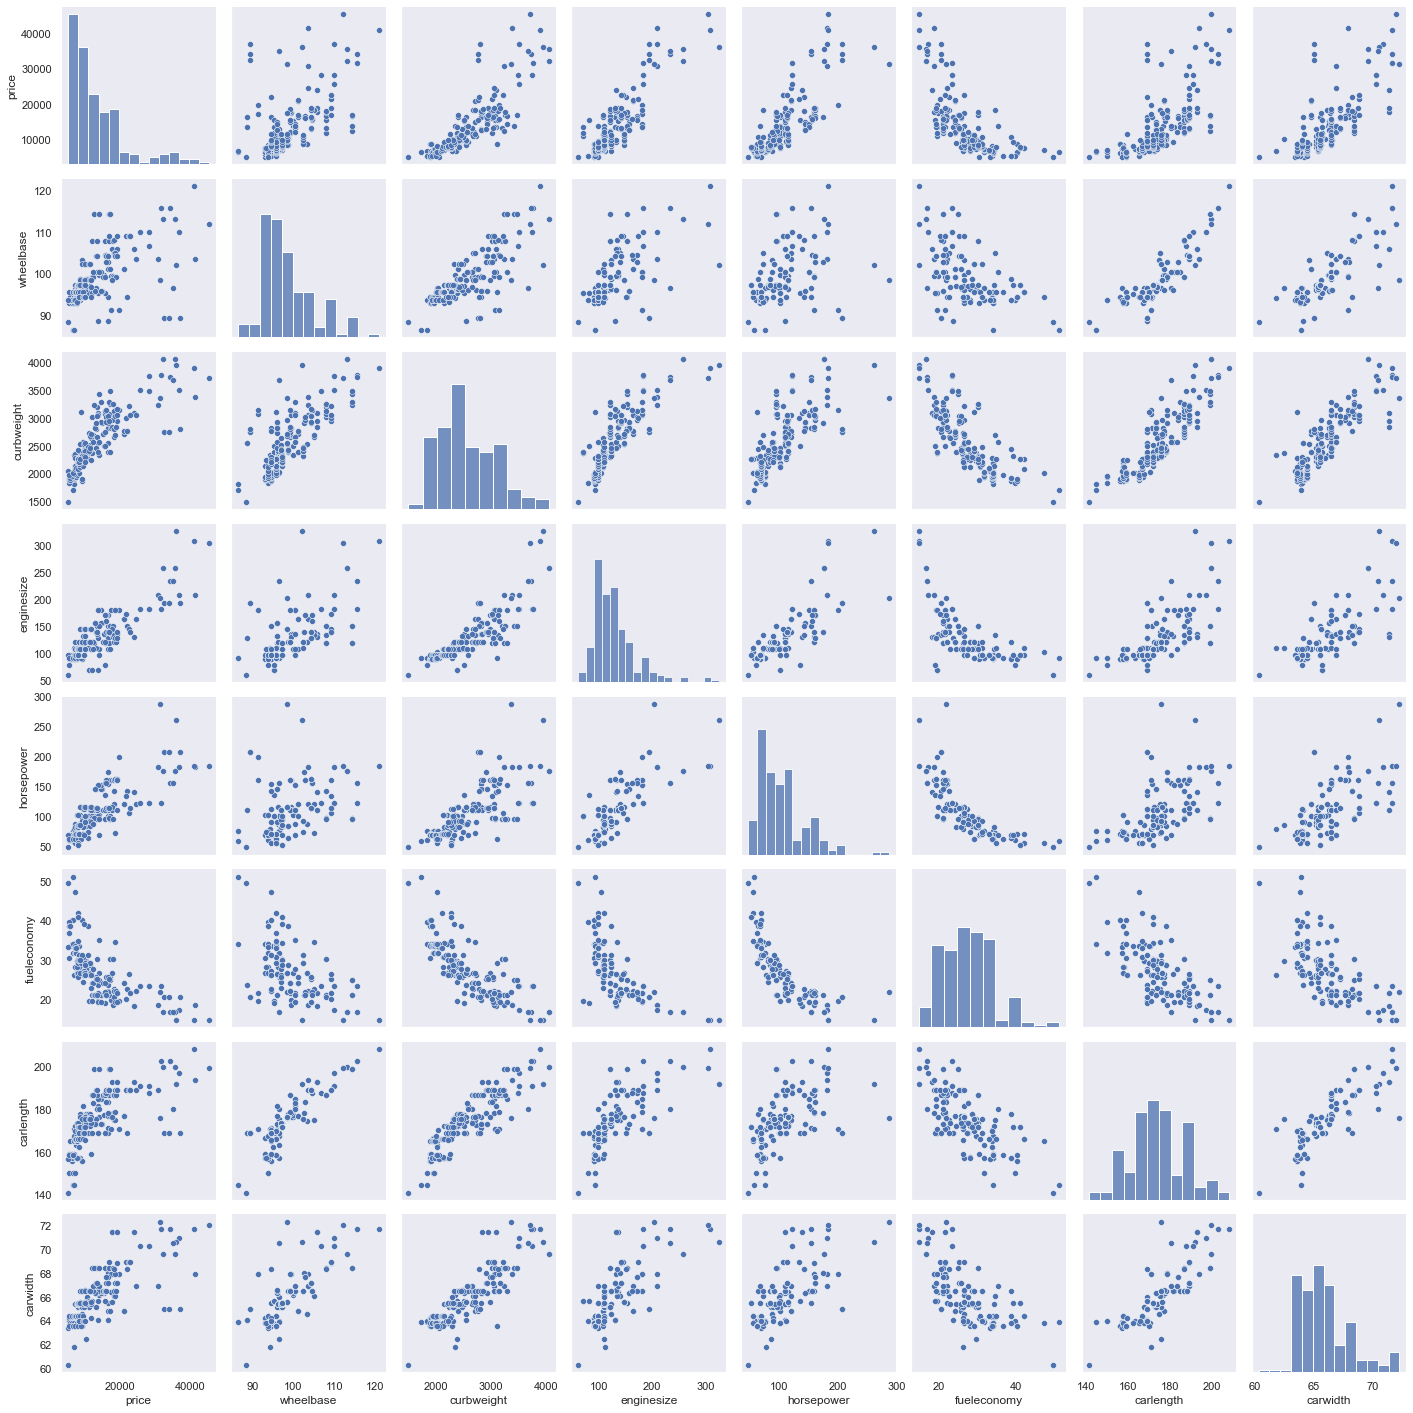

In [63]:
sns.pairplot(data_sv);

In [66]:
#Dummies Variables
def dummies (x,df):
    temp=pd.get_dummies(df[x], drop_first=True)
    df= pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df


data_sv = dummies('carbody',data_sv)
data_sv = dummies('drivewheel',data_sv)
data_sv = dummies('enginetype',data_sv)
data_sv = dummies('cylindernumber',data_sv)
data_sv = dummies('Carsrange',data_sv)

In [67]:
data_sv.head()

,price,wheelbase,curbweight,enginesize,horsepower,fueleconomy,carlength,carwidth,hardtop,hatchback,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,111,23.70,168.8,64.1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,111,23.70,168.8,64.1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,154,22.15,171.2,65.5,0,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,102,26.70,176.6,66.2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,115,19.80,176.6,66.4,0,0,...,0,0,1,0,0,0,0,0,1,0


In [68]:
data_sv.shape

(205, 28)

In [69]:
data_sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        205 non-null    int32  
 1   wheelbase    205 non-null    float64
 2   curbweight   205 non-null    int64  
 3   enginesize   205 non-null    int64  
 4   horsepower   205 non-null    int64  
 5   fueleconomy  205 non-null    float64
 6   carlength    205 non-null    float64
 7   carwidth     205 non-null    float64
 8   hardtop      205 non-null    uint8  
 9   hatchback    205 non-null    uint8  
 10  sedan        205 non-null    uint8  
 11  wagon        205 non-null    uint8  
 12  fwd          205 non-null    uint8  
 13  rwd          205 non-null    uint8  
 14  dohcv        205 non-null    uint8  
 15  l            205 non-null    uint8  
 16  ohc          205 non-null    uint8  
 17  ohcf         205 non-null    uint8  
 18  ohcv         205 non-null    uint8  
 19  rotor   

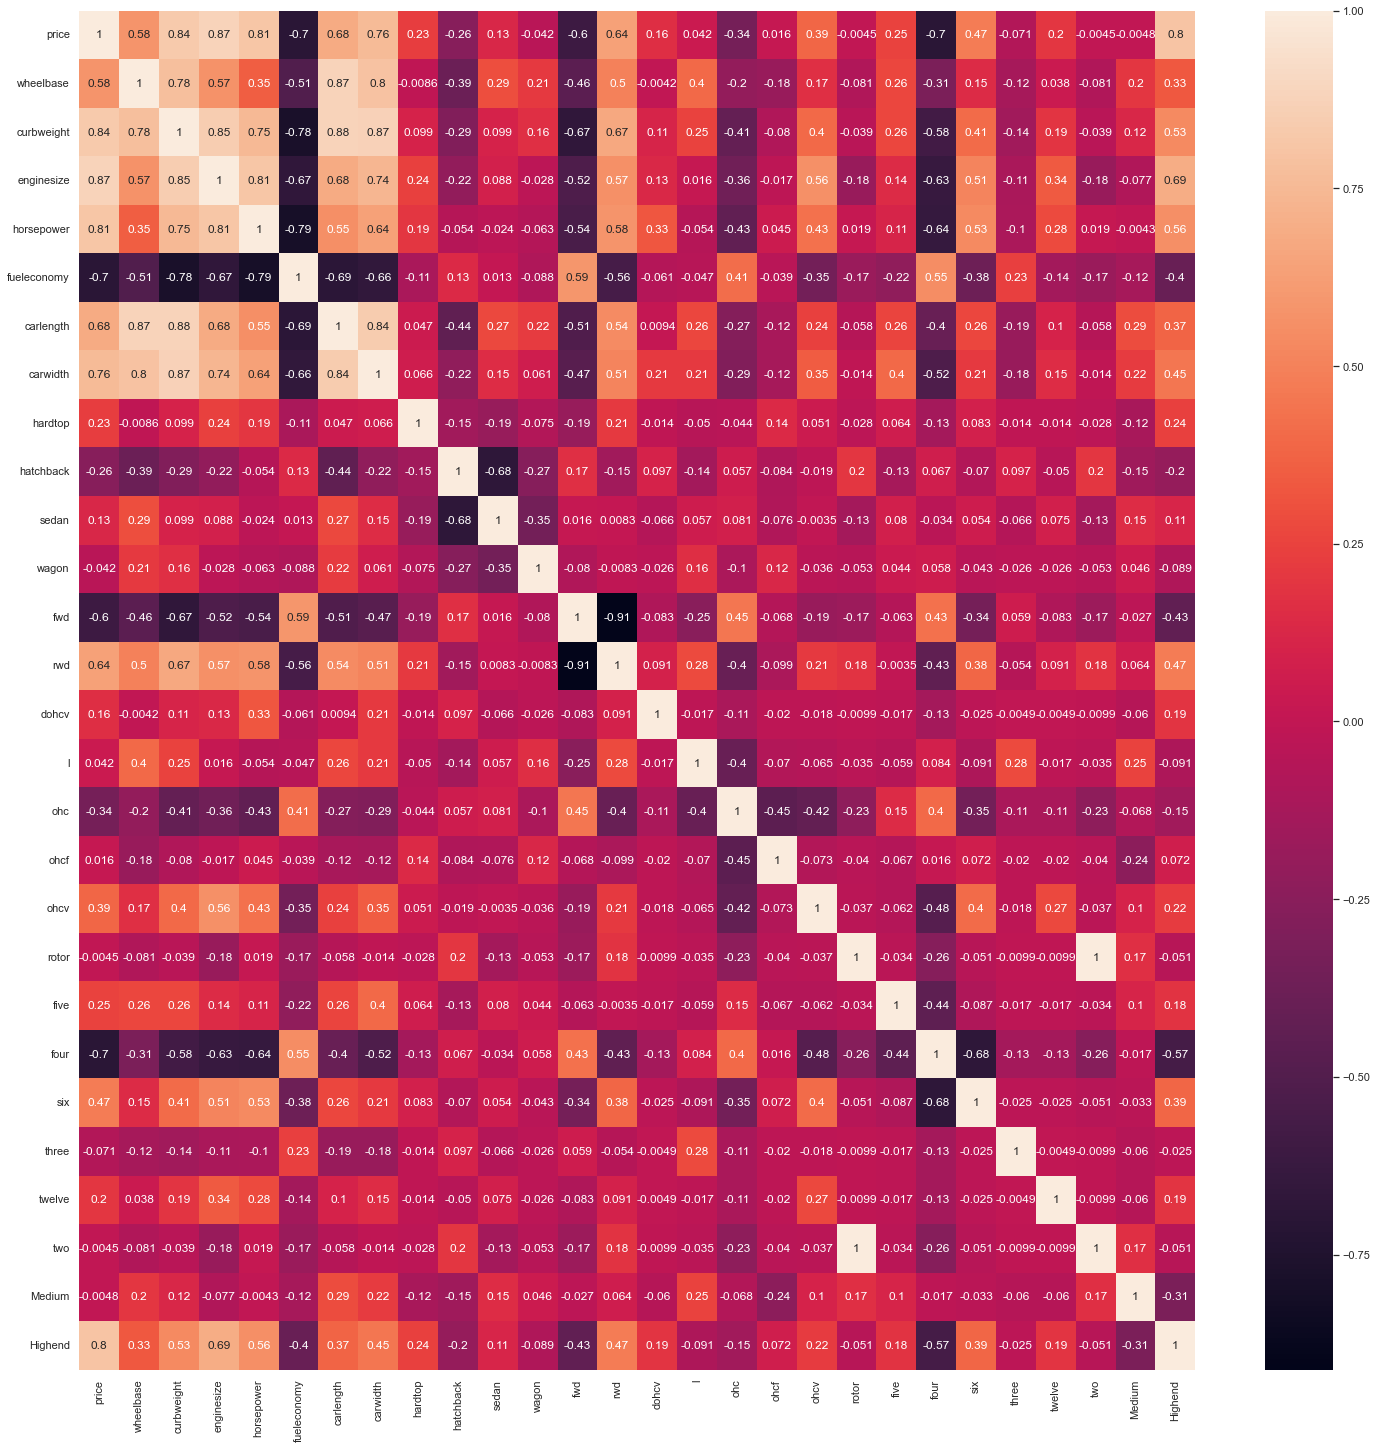

In [70]:
plt.figure(figsize=(25,25))
sns.heatmap(data_sv.corr(), annot=True);


In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
num_var = ['wheelbase', 'curbweight', 'enginesize',  'horsepower','fueleconomy','carlength','carwidth']
data_sv[num_var]= scaler.fit_transform(data_sv[num_var])
pd.set_option('display.max_columns', None)
data_sv.head()


,price,wheelbase,curbweight,enginesize,horsepower,fueleconomy,carlength,carwidth,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,0.058309,0.411171,0.260377,0.262500,0.244170,0.413433,0.316667,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,0.058309,0.411171,0.260377,0.262500,0.244170,0.413433,0.316667,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,0.230321,0.517843,0.343396,0.441667,0.201646,0.449254,0.433333,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,0.384840,0.329325,0.181132,0.225000,0.326475,0.529851,0.491667,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,0.373178,0.518231,0.283019,0.279167,0.137174,0.529851,0.508333,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [75]:
y= data_sv["price"]

In [76]:
X= data_sv.drop(["price"], axis=1) 

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.20, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 27), (41, 27), (164,), (41,))

### Regression Models

In [78]:
models={}

In [79]:
score_fnc= r2_score
param_grid= {"n_estimators": np.arange(10,200,10), "max_features": np.arange(1,29), "bootstrap":[True,False]}
rf = RandomForestRegressor(random_state=24)
val_cv = KFold(shuffle=True, random_state=24)
model_selection= RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=200, cv=val_cv,
                                    scoring=make_scorer(score_fnc), n_jobs=-1, verbose=1)
model_selection.fit(X_train, y_train)
best_RF=model_selection.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [80]:
model_selection.best_params_ , model_selection.best_score_

({'n_estimators': 20, 'max_features': 7, 'bootstrap': True},
 0.9356357604678023)

In [81]:
RandomF= best_RF
RandomF.fit(X_train,y_train)
prediction=RandomF.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
Random_Forest={'Random_Forest':result}
models.update(Random_Forest)

0.882537329254639


In [82]:
La = Lasso(random_state=24)
param_grid = {'alpha': (np.logspace(-8, 8, 100))}
val_cv = KFold(shuffle=True, random_state=24)
model_selection= RandomizedSearchCV(estimator=La, param_distributions=param_grid, n_iter=200, cv=val_cv,
                                    scoring=make_scorer(score_fnc), n_jobs=-1, verbose=1)
model_selection.fit(X_train, y_train)
best_LR=model_selection.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [83]:
model_selection.best_params_ , model_selection.best_score_

({'alpha': 34.30469286314926}, 0.8831376780231264)

In [84]:
Lasso= best_LR
Lasso.fit(X_train,y_train)
prediction=Lasso.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
Lasso_Regressor={'Lasso_Regressor':result}
models.update(Lasso_Regressor)

0.8526744756092034


In [85]:
Lr= LinearRegression()
Lr.fit(X_train,y_train)
prediction=Lr.predict(X_test)
result=r2_score(prediction,y_test)
print(result)
Linear_Regressor={'Linear_Regressor':result}
models.update(Linear_Regressor)

0.8631004245535119


In [86]:
for key, value in models.items():
    print(key,' : ', round(value,4))

Random_Forest  :  0.8825
Lasso_Regressor  :  0.8527
Linear_Regressor  :  0.8631
